In [88]:
# frim https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html

import numpy as np
print('numpy: '+np.version.full_version)
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
from datetime import timedelta, date
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import os

currdir = os.getcwd()





numpy: 1.15.4


In [111]:
# specify the model fit file where the R_est has been estimated


datafilepath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean_rhpbl_meteor_srfit.csv')
output_plot_path = os.path.join(currdir, "plots", "AQmodel", "contribution", "allAY20180212IDW2setclean_rhpbl_sr") 

# so2 aerosol corrected
datafilepath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", "incorrect sr",  'allAY20180212IDW2setclean_wdrhpbl_srfit.csv')
output_plot_path = os.path.join(currdir, "plots", "AQmodel", "contribution", "incorrect sr", "allAY20180212IDW2setcleanSO2_wdrhpbl_sr") 

# back to basic sr
datafilepath = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model",  "SO2_crctn", "wnd_le0", 'wdrhpbl_srfit.csv')
output_plot_path = os.path.join(currdir, "plots", "AQmodel", "contribution", "allAY20180212IDW2setcleanSO2_wdLE0rhpbl") 


In [112]:
def get_contri(joined1):
    # gwet the contribution of ecah emission source
    joined = joined1.copy()
    
    #calcculate the cntribution
    joined["other_contri"] = joined. beta1 / joined["R_est"]
    joined["AR_contri"] =  joined.beta2 * joined.AR/joined["R_est"]
    joined["AC_contri"] = joined.beta3 * joined.AC / joined["R_est"]
    joined["AI_contri"] = joined.beta4 * joined.AI / joined["R_est"]
    joined["AF_contri"] = joined.beta5 * joined.AF / joined["R_est"]
    joined["ABK_contri"] = joined.beta6 * joined.ABK / joined["R_est"]
    joined["AV_contri"] = joined.beta7 * joined.AV / joined["R_est"]
    joined["rhum_contri"] = joined.beta8 * joined.rhum / joined["R_est"]
    joined["pbl_contri"] = joined.beta9 * joined.hpbl / joined["R_est"]
    joined["primary_contri"] = joined["AR_contri"]  + joined["AC_contri"] + joined["AI_contri"] + joined["AF_contri"] + joined["ABK_contri"] + joined["AV_contri"]    
    joined["SA_contri"] =  (joined. beta1  +  joined.beta8 * joined.wnd + joined.beta9 * joined.rhum + joined.beta10 * joined.hpbl) / joined["R_est"] #     joined["pbl_contri"] + joined["rhum_contri"] + joined["other_contri"]
    joined["R_est2"] = joined.beta1 +joined.beta2*joined.AR +joined.beta3*joined.AC +joined.beta4*joined.AI + joined.beta5*joined.AF +joined.beta6*joined.ABK +joined.beta7*joined.AV + joined.beta8*joined.rhum + joined.beta9*joined.hpbl
    joined["R_estratio"] =  joined["R_est2"] / joined["R_est"]
    # get the sd of the contri
    joined["other_contrisd"] = joined. beta1sd / joined["R_est"]
    joined["AR_contrisd"] =  joined.beta2sd * joined.AR/joined["R_est"]
    joined["AC_contrisd"] = joined.beta3sd * joined.AC / joined["R_est"]
    joined["AI_contrisd"] = joined.beta4sd* joined.AI / joined["R_est"]
    joined["AF_contrisd"] = joined.beta5sd * joined.AF / joined["R_est"]
    joined["ABK_contrisd"] = joined.beta6sd * joined.ABK / joined["R_est"]
    joined["AV_contrisd"] = joined.beta7sd * joined.AV / joined["R_est"]
    joined["rhum_contrisd"] = joined.beta8sd * joined.rhum / joined["R_est"]
    joined["pbl_contrisd"] = joined.beta9sd * joined.hpbl / joined["R_est"]
    joined["SA_contrisd"] = (joined. beta1sd**2  +  (joined.beta8sd * joined.wnd) **2  + (joined.beta9sd * joined.rhum) **2 + (joined.beta10sd * joined.hpbl)**2    )**0.5/ joined["R_est"] #  
    
    return joined

In [113]:
# opent the fitted Rest file path and get their contri

df_Rest = pd.read_csv(datafilepath, header = 0)
df_Rest["date"] = pd.to_datetime(df_Rest['date'], format="%Y-%m-%d")
df_Rest["year"] = df_Rest["date"].dt.year
df_contriall = get_contri(df_Rest)

In [58]:
df_contriall.city.unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Chennai', 'Kanpur', 'Lucknow',
       'Ludhiana', 'Patna', 'Raipur', 'Hyderabad', 'Jaipur', 'Bangalore',
       'Kolkata', 'NewDelhi', 'Mumbai'], dtype=object)

In [114]:

# get monthly contri for New Delhi for 2015

city = "NewDelhi"
year = 2015

df = df_contriall.loc[df_contriall["city_coord"]==city]
df_contri = df.loc[df["date"].dt.year==year][["month","AR_contri", "AC_contri", "AI_contri", "ABK_contri", "AF_contri", "AV_contri", "SA_contri"]]


df_contri


,month,AR_contri,AC_contri,AI_contri,ABK_contri,AF_contri,AV_contri,SA_contri
2642,1,0.395479,0.032627,0.033066,0.129801,0.000414,0.040605,0.368008
2643,2,0.375923,0.031013,0.036266,0.142364,0.001761,0.040081,0.372591
2644,3,0.350321,0.028901,0.036612,0.143724,0.006346,0.035968,0.398126
2645,4,0.300581,0.024798,0.041885,0.164424,0.013185,0.041148,0.413979
2646,5,0.278651,0.022988,0.038830,0.152428,0.146811,0.038146,0.322146
2647,6,0.336920,0.027796,0.052818,0.000000,0.019574,0.051888,0.511004
2648,7,0.284248,0.023450,0.023766,0.000000,0.002184,0.046695,0.619657
2649,8,0.243098,0.020055,0.025406,0.000000,0.001134,0.049919,0.660388
2650,9,0.269846,0.022262,0.028202,0.000000,0.001763,0.055411,0.622516
2651,10,0.328042,0.027063,0.039182,0.153811,0.030846,0.038492,0.382563


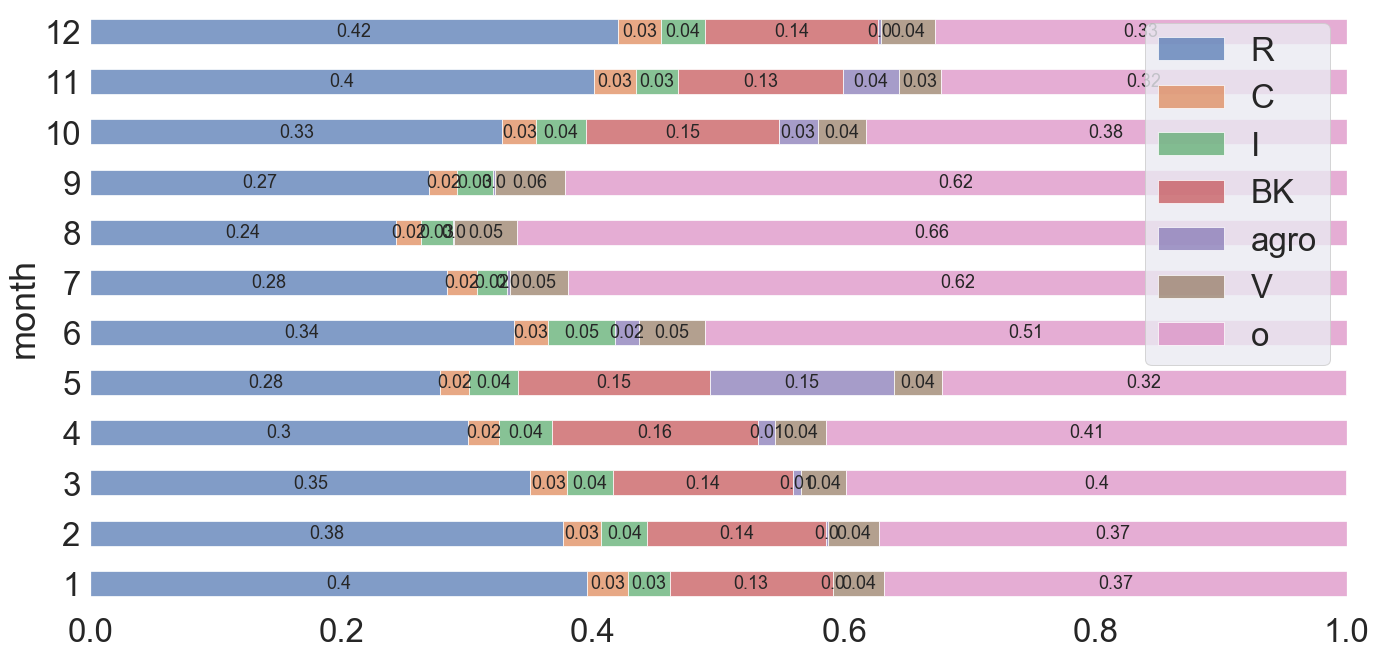

In [115]:
sns.set_style("white")
sns.set_style("ticks")

df = df_contri.transpose().drop(["month"]).transpose
df = df_contri.set_index("month").round(4)
df.columns = ["R", "C", "I", "BK", "agro", "V", "o"] 


sns.set(font_scale=3)

ax = df.plot.barh(legend=False, figsize=(20,10), stacked=True, alpha = 0.7)
ax.set_facecolor('white')

labels = []
for j in df.columns:
    for i in df.index:
        label =  str(df.loc[i][j].round(2))
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=18)
ax.set_xlim([0,1])     
plt.legend(loc = "upper right")
plt.tight_layout()
plt.savefig(os.path.join(output_plot_path,   "NewDelhi_monthly2015.png"))

In [116]:
city = "NewDelhi"
year = 2015

df = df_contriall.loc[df_contriall["city_coord"]==city]
df_contri = df.loc[df["date"].dt.year==year][["month","AR_contrisd", "AC_contrisd", "AI_contrisd", "ABK_contrisd", "AF_contrisd", "AV_contrisd", "SA_contrisd"]]


df_contri

,month,AR_contrisd,AC_contrisd,AI_contrisd,ABK_contrisd,AF_contrisd,AV_contrisd,SA_contrisd
2642,1,0.107581,0.023039,0.021304,0.044989,0.000099,0.022469,0.074170
2643,2,0.102261,0.021900,0.023366,0.049344,0.000419,0.022180,0.080226
2644,3,0.095297,0.020408,0.023589,0.049815,0.001509,0.019904,0.085249
2645,4,0.081766,0.017510,0.026986,0.056989,0.003135,0.022770,0.093817
2646,5,0.075800,0.016233,0.025017,0.052832,0.034910,0.021109,0.078395
2647,6,0.091651,0.019627,0.034030,0.000000,0.004654,0.028713,0.110718
2648,7,0.077323,0.016559,0.015312,0.000000,0.000519,0.025839,0.125484
2649,8,0.066129,0.014162,0.016369,0.000000,0.000270,0.027623,0.137905
2650,9,0.073405,0.015720,0.018170,0.000000,0.000419,0.030663,0.124033
2651,10,0.089236,0.019110,0.025244,0.053311,0.007335,0.021300,0.081041


In [127]:
# get annual contri for New Delhi for the month of december

city = "Kanpur"
month = 11

df = df_contriall.loc[df_contriall["city_coord"]==city]
df_contri = df.loc[df["date"].dt.month==month][["year","AR_contri", "AC_contri", "AI_contri", "ABK_contri", "AF_contri", "AV_contri", "SA_contri",]]# "AR_contrisd", "AI_contrisd", "ABK_contrisd"]]


df_contri

,year,AR_contri,AC_contri,AI_contri,ABK_contri,AF_contri,AV_contri,SA_contri
861,2013,0.417011,0.003246,0.015075,0.138398,0.003880,0.002190,0.420200
873,2014,0.433192,0.003469,0.017108,0.143907,0.006657,0.002392,0.393274
885,2015,0.407363,0.003347,0.017638,0.136135,0.006317,0.002637,0.426562
754,2004,0.392553,0.002221,0.005418,0.148692,0.003891,0.001019,0.446206
766,2005,0.405681,0.002394,0.006284,0.147235,0.007086,0.000918,0.430401
778,2006,0.404190,0.002510,0.007263,0.143802,0.006048,0.000902,0.435285
718,2001,0.337550,0.001487,0.003476,0.161109,0.005194,0.000750,0.490435
742,2003,0.372954,0.002000,0.004669,0.150660,0.002182,0.001070,0.466465
730,2002,0.370950,0.001825,0.004520,0.158896,0.002821,0.001085,0.459903
838,2011,0.412823,0.003036,0.013318,0.139081,0.004354,0.002150,0.425239


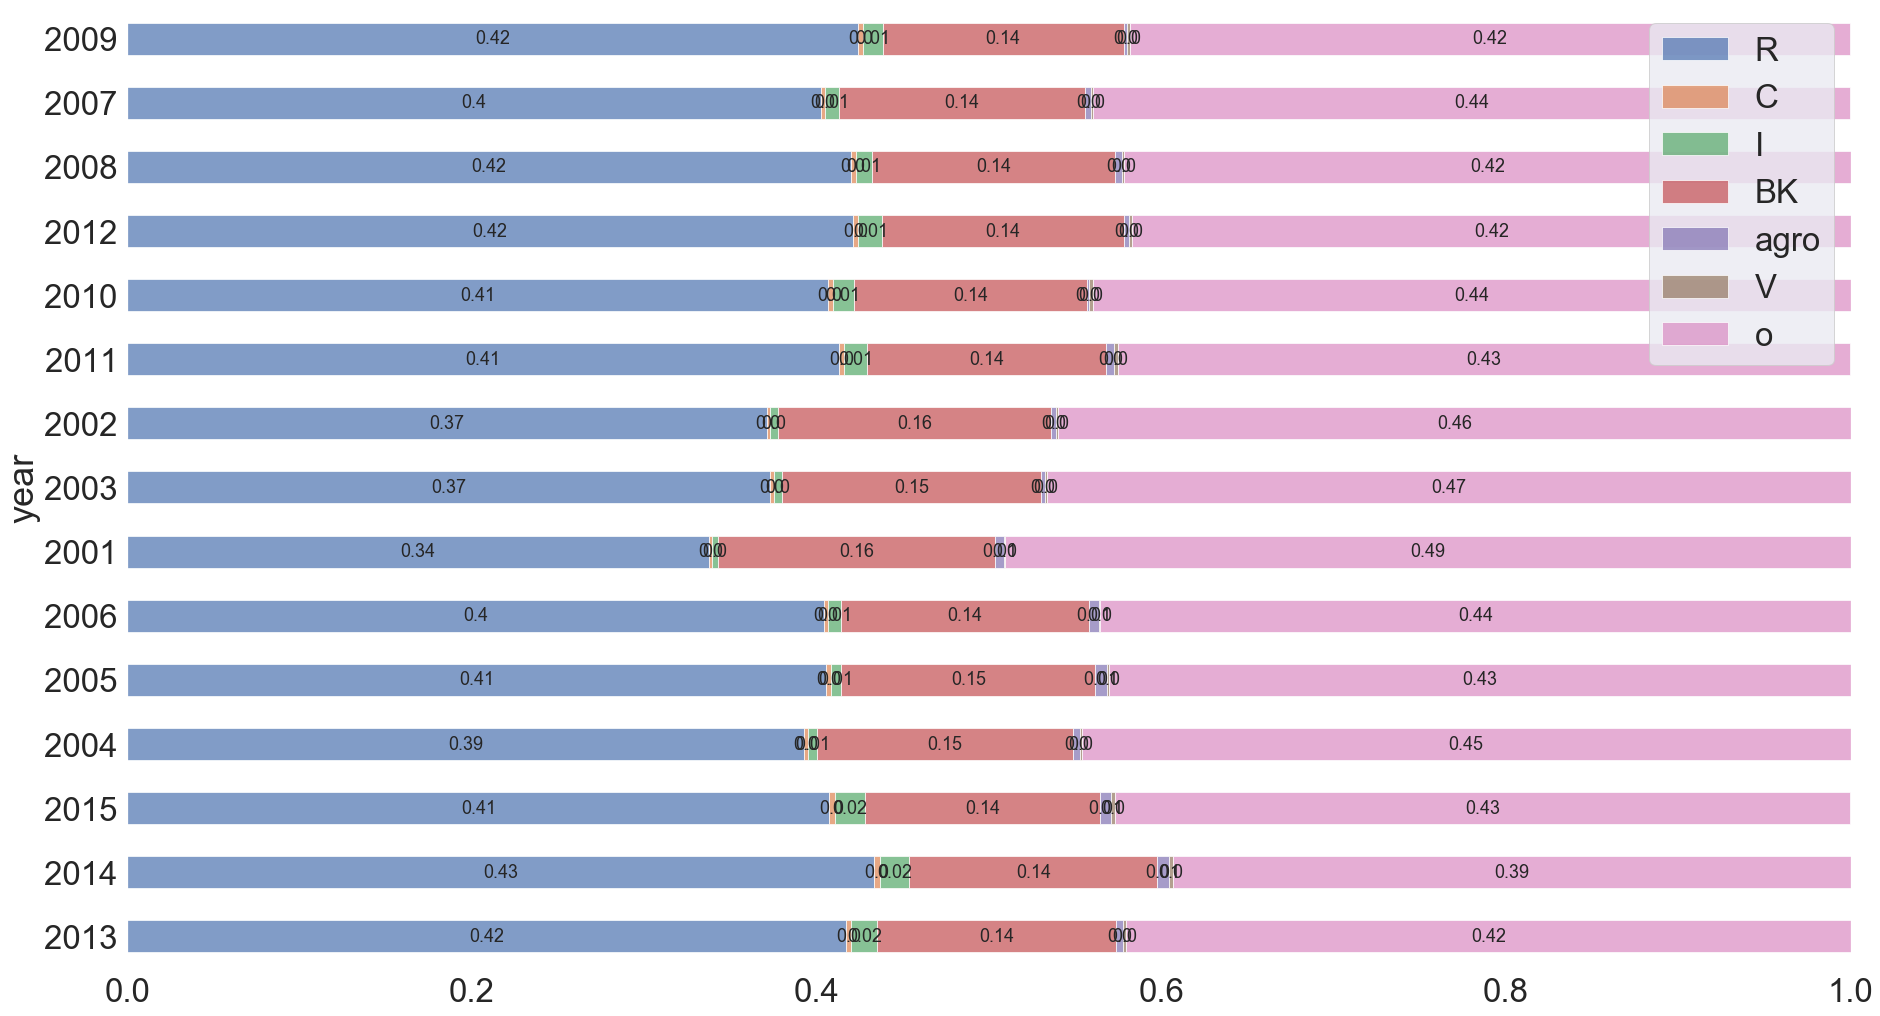

In [128]:
#df = df_contri.transpose().drop(["month"]).transpose
df = df_contri.set_index("year").round(4)
df.columns = ["R", "C", "I", "BK", "agro", "V", "o"] 


sns.set(font_scale=3)

ax = df.plot.barh( legend=False, figsize=(27,15), stacked=True, alpha = 0.7)
ax.set_facecolor('white')

labels = []
for j in df.columns:
    for i in df.index:
        label =  str(df.loc[i][j].round(2))
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=18)
ax.set_xlim([0,1])   
plt.legend(loc = "upper right")
plt.tight_layout()
plt.savefig(os.path.join(output_plot_path,   "NewDelhi_annual_m11.png"))

In [119]:
# get annual contri for all cities for the month of december

df_Rest = pd.read_csv(datafilepath, header = 0)
df_Rest["date"] = pd.to_datetime(df_Rest['date'], format="%Y-%m-%d")
df_Rest["year"] = df_Rest["date"].dt.year
df_contriall = get_contri(df_Rest)
df_contriall.sort_values(by = ['cityID2'], inplace = True, ascending=False)

year = 2014
month = 11

df = df_contriall.loc[df_contriall["date"].dt.year==year]
df_contri = df.loc[df["date"].dt.month==month][["city","AR_contri", "AC_contri", "AI_contri", "ABK_contri", "AF_contri", "AV_contri", "SA_contri"]]


df_contri


,city,AR_contri,AC_contri,AI_contri,ABK_contri,AF_contri,AV_contri,SA_contri
2117,Jaipur,0.118633,0.032818,0.064334,0.049856,0.057437,0.001953,0.674968
1584,Raipur,0.224943,0.002477,0.016695,0.087300,0.010804,0.000523,0.657258
1410,Patna,0.563397,0.005106,0.066950,0.215775,0.001588,0.000215,0.146969
1231,Ludhiana,0.422821,0.002180,0.034075,0.036426,0.044166,0.001212,0.459119
1051,Lucknow,0.491758,0.006224,0.006577,0.106077,0.004890,0.007194,0.377280
873,Kanpur,0.433192,0.003469,0.017108,0.143907,0.006657,0.002392,0.393274
515,Allahabad,0.651043,0.001281,0.010192,0.065855,0.003783,0.000244,0.267602
338,Ahmedabad,0.068073,0.019742,0.077783,0.040333,0.006794,0.005062,0.782213
166,Agra,0.590726,0.004556,0.026350,0.032039,0.012249,0.000741,0.333340
2460,Kolkata,0.393035,0.022431,0.097480,0.252647,0.001942,0.010384,0.222081


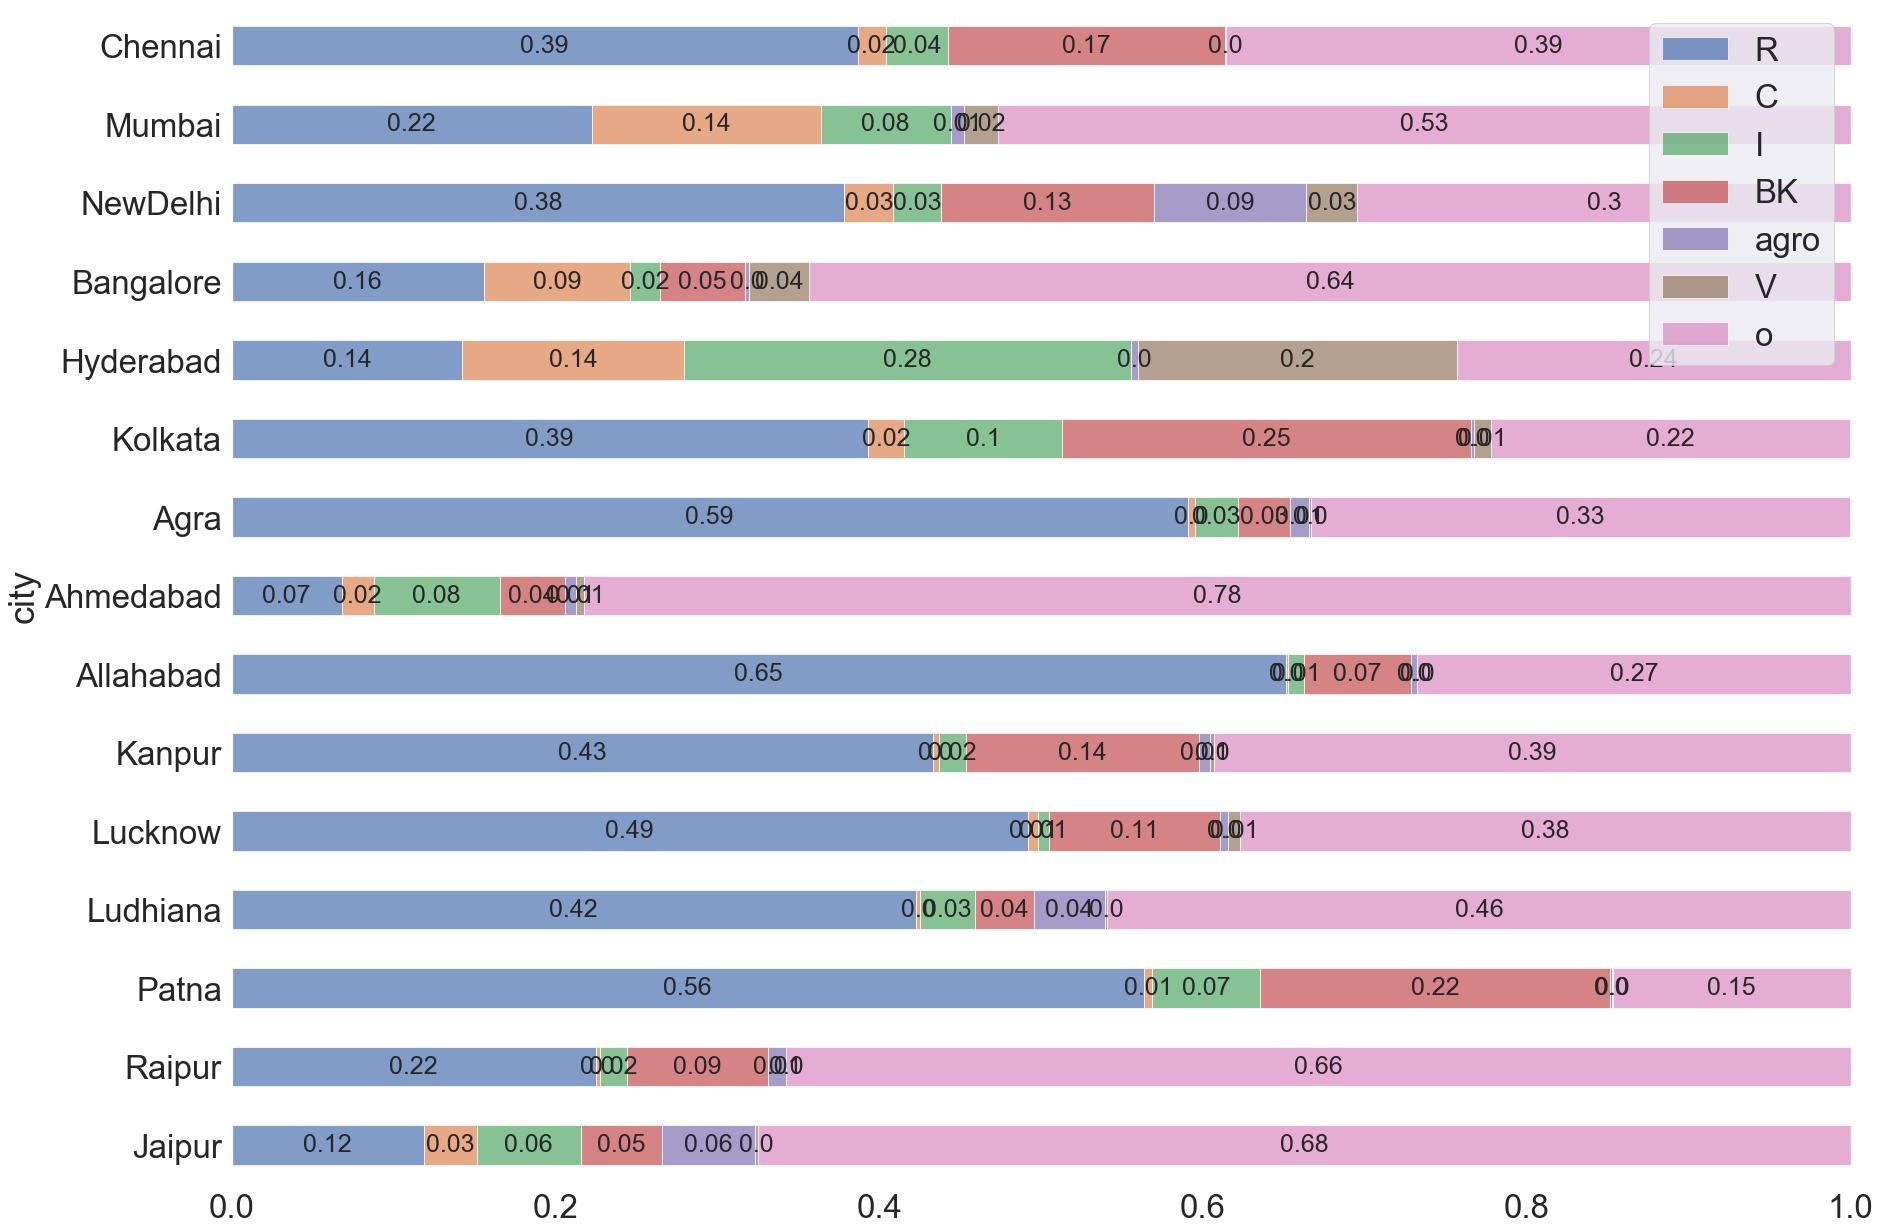

In [120]:
#df = df_contri.transpose().drop(["month"]).transpose
df = df_contri.drop_duplicates(subset='city', keep='last').set_index("city").round(4)
#df = df.drop(["Jaipur", "Ahmedabad", "Ludhiana"])
df.columns = ["R", "C", "I", "BK", "agro", "V", "o"] 


sns.set(font_scale=3)

ax = df.plot.barh(legend=False, figsize=(27,18), stacked=True, alpha =0.7)
ax.set_facecolor('white')

labels = []
for j in df.columns:
    for i in df.index:
        label =  str(df.loc[i][j].round(2))
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=25)
ax.set_xlim([0,1])        
plt.legend(loc = "upper right")
plt.tight_layout()
plt.savefig(os.path.join(output_plot_path,   "Allcity_2015_m11.png"))

In [121]:
# get contri and sd

# get annual contri for all cities for the month of december

df_Rest = pd.read_csv(datafilepath, header = 0)
df_Rest["date"] = pd.to_datetime(df_Rest['date'], format="%Y-%m-%d")
df_Rest["year"] = df_Rest["date"].dt.year
df_contriall = get_contri(df_Rest)
df_contriall.sort_values(by = ['cityID2'], inplace = True)
year = 2014
month = 11

df = df_contriall.loc[df_contriall["date"].dt.year==year]
df_contri = df.loc[df["date"].dt.month==month][["city","AR_contri",  "AR_contrisd",  "AC_contri", "AC_contrisd",  "AI_contri", "AI_contrisd",  "ABK_contri", "ABK_contrisd", "AF_contri", "AF_contrisd", "AV_contri", "AV_contrisd", "SA_contri", "SA_contrisd"]]


df_contri


,city,AR_contri,AR_contrisd,AC_contri,AC_contrisd,AI_contri,AI_contrisd,ABK_contri,ABK_contrisd,AF_contri,AF_contrisd,AV_contri,AV_contrisd,SA_contri,SA_contrisd
695,Chennai,0.386770,0.169630,0.017326,0.013837,0.038367,0.034702,0.171091,0.089240,0.000440,0.000172,0.000000,0.000000,0.386006,0.240249
2797,Mumbai,0.222440,0.153535,0.141368,0.088452,0.080381,0.054094,0.000000,0.000000,0.008511,0.003480,0.020975,0.012593,0.526325,0.119040
2640,NewDelhi,0.378550,0.102976,0.030223,0.021342,0.029693,0.019131,0.131228,0.045484,0.094289,0.022421,0.031462,0.017410,0.304555,0.068749
2288,Bangalore,0.155680,0.109482,0.090454,0.061534,0.018429,0.014677,0.052340,0.041710,0.002970,0.001188,0.037004,0.023194,0.643123,0.228622
1924,Hyderabad,0.142492,0.130562,0.136669,0.103749,0.276501,0.152721,0.000000,0.000000,0.004167,0.002944,0.196804,0.138431,0.243366,0.225433
1923,Hyderabad,0.142492,0.130562,0.136669,0.103749,0.276501,0.152721,0.000000,0.000000,0.004167,0.002944,0.196804,0.138431,0.243366,0.225433
2460,Kolkata,0.393035,0.159839,0.022431,0.018451,0.097480,0.054467,0.252647,0.072838,0.001942,0.001490,0.010384,0.008744,0.222081,0.108821
166,Agra,0.590726,0.130742,0.004556,0.003640,0.026350,0.014252,0.032039,0.018722,0.012249,0.008369,0.000741,0.000672,0.333340,0.132433
338,Ahmedabad,0.068073,0.056608,0.019742,0.014483,0.077783,0.046850,0.040333,0.038072,0.006794,0.002599,0.005062,0.003343,0.782213,0.126826
515,Allahabad,0.651043,0.134531,0.001281,0.001092,0.010192,0.009012,0.065855,0.044460,0.003783,0.001609,0.000244,0.000163,0.267602,0.106321


In [101]:
df_contriall.columns.values

array(['date', 'R', 'month', 'AvgHumidity', 'beta', 'AR', 'AC', 'AI',
       'AF', 'ABK', 'AV', 'const', 'cityID', 'city', 'cityID2', 'TierID',
       'tmax', 'city_coord', 'tmin', 'rhum', 'uwnd', 'vwnd', 'hpbl',
       'wnd', 'beta1', 'beta2', 'beta3', 'beta4', 'beta5', 'beta6',
       'beta7', 'beta8', 'beta9', 'beta10', 'beta1sd', 'beta2sd',
       'beta3sd', 'beta4sd', 'beta5sd', 'beta6sd', 'beta7sd', 'beta8sd',
       'beta9sd', 'beta10sd', 'R_est', 'R_est_2sdevL', 'R_est_2sdevU',
       'CI', 'PI', 'year', 'other_contri', 'AR_contri', 'AC_contri',
       'AI_contri', 'AF_contri', 'ABK_contri', 'AV_contri', 'rhum_contri',
       'pbl_contri', 'primary_contri', 'SA_contri', 'R_est2',
       'R_estratio', 'other_contrisd', 'AR_contrisd', 'AC_contrisd',
       'AI_contrisd', 'AF_contrisd', 'ABK_contrisd', 'AV_contrisd',
       'rhum_contrisd', 'pbl_contrisd', 'SA_contrisd'], dtype=object)

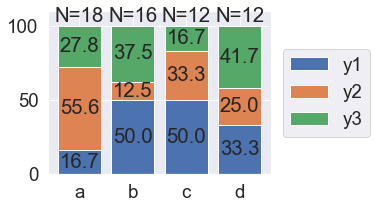

In [21]:
# trial

x = ["a","b","c","d"]
y1 = np.array([3,8,6,4])
y2 = np.array([10,2,4,3])
y3 = np.array([5,6,2,5])

# memo of sample number
snum = y1+y2+y3

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.

plt.figure(figsize=(4,3))

# stack bars
plt.bar(x, y1, label='y1')
plt.bar(x, y2 ,bottom=y1,label='y2')
plt.bar(x, y3 ,bottom=y1+y2,label='y3')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2+y3, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,110)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

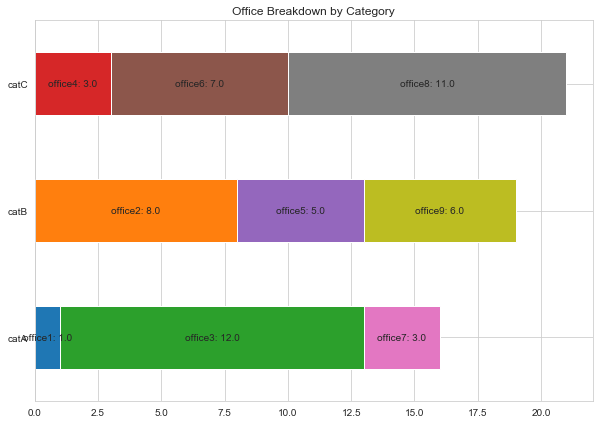

In [113]:
#https://stackoverflow.com/questions/39279404/adding-labels-to-stacked-bar-chart
import pandas as pd


df = pd.DataFrame({'office1': pd.Series([1,np.nan,np.nan], index=['catA', 'catB', 'catC']),
              'office2': pd.Series([np.nan,8,np.nan], index=['catA', 'catB', 'catC']),
              'office3': pd.Series([12,np.nan,np.nan], index=['catA', 'catB', 'catC']),
              'office4': pd.Series([np.nan,np.nan,3], index=['catA', 'catB', 'catC']),
              'office5': pd.Series([np.nan,5,np.nan], index=['catA', 'catB', 'catC']),
              'office6': pd.Series([np.nan,np.nan,7], index=['catA', 'catB', 'catC']),
              'office7': pd.Series([3,np.nan,np.nan], index=['catA', 'catB', 'catC']),
              'office8': pd.Series([np.nan,np.nan,11], index=['catA', 'catB', 'catC']),
              'office9': pd.Series([np.nan,6,np.nan], index=['catA', 'catB', 'catC']),
              })
ax = df.plot.barh(title="Office Breakdown by Category", legend=False, figsize=(10,7), stacked=True)

labels = []
for j in df.columns:
    for i in df.index:
        label = str(j)+": " + str(df.loc[i][j])
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')